In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/sample_data/Mobile-Company-Telco-Customer-Churn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(['customerID', 'TotalCharges'], axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# df['StreamingMovies'].dtype
for col in df.columns:
  if df[col].dtype == 'O':
    label_encode = LabelEncoder()
    df[col] = label_encode.fit_transform(df[col])
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,1


In [ ]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

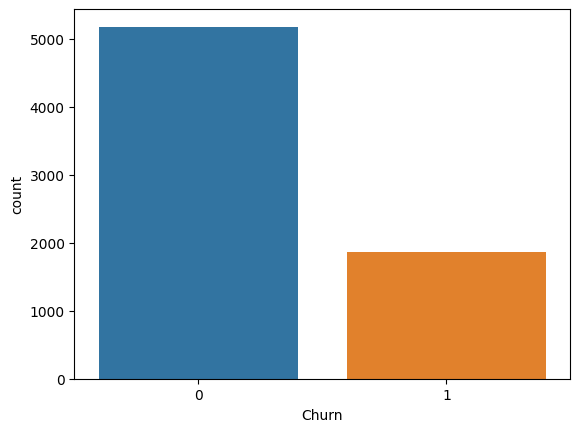

In [ ]:
sns.countplot(x ='Churn', data = df)

In [ ]:
X = df.drop('Churn', axis = 1)
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred = tree.predict(X_test)

In [ ]:
# print(y_test)
y_test.value_counts()

0    1539
1     574
Name: Churn, dtype: int64

574


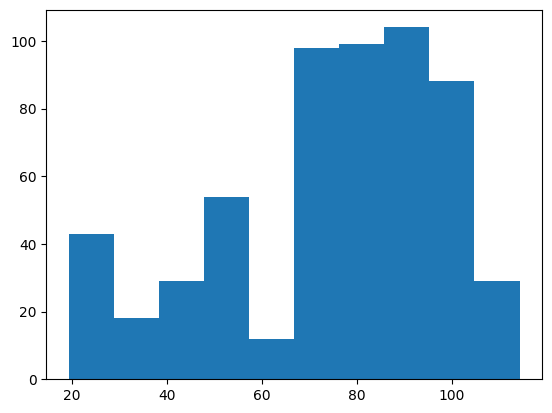

In [ ]:
# print(pred)
left_customers = X_test.loc[y_test == 1]
print(len(left_customers))
plt.hist(left_customers['MonthlyCharges'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7269285376242309
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1539
           1       0.50      0.50      0.50       574

    accuracy                           0.73      2113
   macro avg       0.66      0.66      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=84)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:
tree.fit(X_res, y_res)

DecisionTreeClassifier()

In [ ]:
pred_res = tree.predict(X_test)

In [ ]:
print(accuracy_score(y_test, pred_res))
print(classification_report(y_test, pred_res))

0.7297681022243256
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1539
           1       0.50      0.59      0.54       574

    accuracy                           0.73      2113
   macro avg       0.67      0.69      0.68      2113
weighted avg       0.75      0.73      0.74      2113

